In [2]:
import _init_paths
import tensorflow as tf
from fast_rcnn.config import cfg
from fast_rcnn.test import im_detect
from fast_rcnn.nms_wrapper import nms
from utils.timer import Timer
import matplotlib.pyplot as plt
import numpy as np
import os, sys, cv2
from networks.factory import get_network
% matplotlib inline
import cPickle
import pandas as pd

In [85]:
results_path = "/root/faster_rcnn/output/faster_rcnn_end2end/voc_2007_test"
results_file = os.path.join(results_path,'VGGnet_fast_rcnn_iter_%d','%s_basket_pr.pkl')

In [86]:
def load_ap_data(file_in):
        """
        Loads results from pickle file and returns contents
        """
        if os.path.exists(file_in):
            with open(file_in, 'rb') as fid:
                resdb = cPickle.load(fid)
            return resdb

In [97]:
ap_empty = []
ap_full = []
iters = []
for n_iter in range(1,21):
    data_empty = load_ap_data(results_file%(n_iter*1000,'empty'))
    data_full = load_ap_data(results_file%(n_iter*1000,'full'))
    ap_empty.append(data_empty['ap'])
    ap_full.append(data_full['ap'])
    iters.append(n_iter)

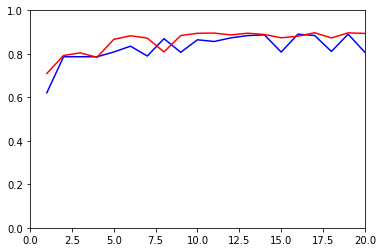

In [105]:
plt_empty = plt.plot(iters, ap_empty, color = 'blue')
plt_full = plt.plot(iters, ap_full, color = 'red')
plt.axis([0, 20, 0, 1])
plt.show()